In [ ]:
%pip install cirq
%pip install numpy

In [1]:
import cirq
from cirq.contrib.svg import SVGCircuit

from utils import build_routed_circuit

# DCM 26

In this notebook, we will go through a simplified example of how quantum computers can provide an advantage in cryptography. <br>
Assume that Alice wants to send to Bob a secret binary string $s = s_0 \ldots s_{n-1}$ but she know that inbetween them Charlie is ready to intercept the message.<br>
One way she can protect the secret string is by encoding it into a binary function $f_s$:<br><br>
$f_s(x) = s.x = s_0x_0 \oplus \ldots \oplus s_{n-1}x_{n-1}$<br><br>
Where $x=x_{0} \ldots x_{n-1}$ is also a binary string and the "." and "$\oplus$" operations are defined by:
| a | b |a.b|
|---|---|:---:|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

And:

| a | b |a $\oplus$ b|
|---|---|:----------:|
| 0 | 0 |      0     |
| 0 | 1 |      1     |
| 1 | 0 |      1     |
| 1 | 1 |      0     |

For example, imagine that Alice wants to send the string "$s = 101$" to Bob, then she would encodes this into the function $f_s$ with the following behaviour:
| x |$f_s$(x) |
|---|:---:|
|000|  0  |
|001|  1  |
|010|  0  |
|011|  1  |
|100|  1  |
|101|  0  |
|110|  1  |
|111|  0  |

Let's check some of these lines:<br>
$f_s(000) = 1.0 \oplus 0.0 \oplus 1.0 = 0 \oplus 0 \oplus 0 = 0 \oplus 0 = 0$<br>
$f_s(101) = 1.1 \oplus 0.0 \oplus 1.1 = 1 \oplus 0 \oplus 1 = 1 \oplus 1 = 0$<br>
$f_s(100) = 1.1 \oplus 0.0 \oplus 1.0 = 1 \oplus 0 \oplus 0 = 1 \oplus 0 = 1$<br>

In fact, if Charlie wanted to find the secret string, he would need to test different inputs and note the corresponding output. Classically, the most efficient scheme requires Charlie to test:<br>
$f_s(100) = 1$<br>
$f_s(010) = 0$<br>
$f_s(001) = 1$<br>
To find that the secret string is indeed "101".<br>
In general, if the length of the string is $n$, Charlie would need to test $n$ different inputs. This is fine as long as $n$ is not too large.<br>
So if $n$ is large enough, it will take a long time for Charlie to decode the secret string but this will also be the case for Bob which is not ideal.

### Bernstein-Vazirani Algorithm
In contrast, if Alice and Bob were the only persons in the world to possess a quantum computer they could use the Bernstein-Vazirani algorithm to encode and quickly decode the secret string.<br>
As a reminder, Alice would need to encode the string into this black box quantum circuit:<br>
<img src="images/image.png" width=200><br>
And hand it to Bob. Bob would then plug this black box into the following quantum circuit:<br>
<img src="images/image-1.png" width=500><br>
By performing only one measurement, Bob would be able to read the secret string: "101".

### Task
For this exercise, you will encode "DCM26" using Morse code.<br>
<img src="images/morse.png"><br>
Each character will then be translated into a binary string over 10 bits which will be transmitted to a third party and decoded thanks to the B-V algo. <br>
For the Morse code to binary string, please use the following scheme:<br>
|Morse|Binary|
|:---:|:----:|
|  .  |  10  |
|  _  |  11  |
|     |  00  |

For example:<br>
|character|Morse|  Binary  |
|:-------:|:---:|:--------:|
|    F    | ..-.|1010111000|
|    5    |.....|1010101010|

## Designing the quantum circuits
For example the B-V circuit corresponding to the character "F" would look like: 

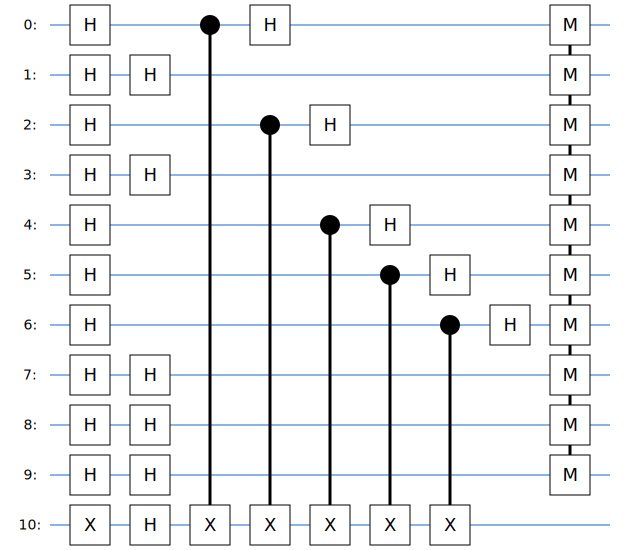

In [2]:
qubits = cirq.LineQubit.range(11)
circuit_F = cirq.Circuit(
    [
        cirq.X(qubits[10]),
        cirq.H.on_each(qubits),
        cirq.CX(qubits[0], qubits[10]),
        cirq.CX(qubits[2], qubits[10]),
        cirq.CX(qubits[4], qubits[10]),
        cirq.CX(qubits[5], qubits[10]),
        cirq.CX(qubits[6], qubits[10]),
        cirq.H.on_each(*qubits[:10]),
        cirq.measure(*qubits[:10])
    ]
)
SVGCircuit(circuit_F)

Now encode each character of "DCM26" into its own Bernstein-Vazirani circuit:

### Circuit for D

In [ ]:
qubits = cirq.LineQubit.range(11)
circuit_D = cirq.Circuit(
    [
        # Add gates here, don't forget the measurements
    ]
)
SVGCircuit(circuit_D)

### Circuit for C

In [ ]:
qubits = cirq.LineQubit.range(11)
circuit_C = cirq.Circuit(
    [
        # Add gates here, don't forget the measurements
    ]
)
SVGCircuit(circuit_C)

### Circuit for M

In [ ]:
qubits = cirq.LineQubit.range(11)
circuit_M = cirq.Circuit(
    [
        # Add gates here, don't forget the measurements
    ]
)
SVGCircuit(circuit_M)

### Circuit for 2

In [ ]:
qubits = cirq.LineQubit.range(11)
circuit_2 = cirq.Circuit(
    [
        # Add gates here, don't forget the measurements
    ]
)
SVGCircuit(circuit_2)

### Circuit for 6

In [ ]:
qubits = cirq.LineQubit.range(11)
circuit_6 = cirq.Circuit(
    [
        # Add gates here, don't forget the measurements
    ]
)
SVGCircuit(circuit_6)

## Mapping to the SQALE hardware

The qubits in SQALE are not placed on parallel lines but rather on a square lattice. This affects the connections map where each qubit is only connected to its 4 nearest neighbours. In order to run the previous cricuits on SQALE, you will have to reroute each CX gates to take into account this constraint.<br>
For example, assume you want to apply a CX gate between the qubits 0 and 8 in the following grid:<br>
<img src="images/grid_sqale.png" width=300><br>
Given the grid connectivity, you will have to route this connection through some intermediate qubits. For example:<br>
<img src="images/grid_sqale_cx.png" width=300><br>
To see why this works, remember that applying a CX gate targeting qubit 2 in state $x_2$ and controlled qubit 1 in state $x_1$ will result in the qubit 2 being in state $x_1 \oplus x_2$.
Let's follow the routing from top to bottom and left to right:<br>
- The CX gate from (0, 0) in state $x_{0,0}$ to (1, 0) in state $x_{1,0}$ wil result in the qubit (1,0) being in the state $x_{0,0} \oplus x_{1,0}$<br>
- The CX gate from (1, 0) in state $x_{0,0} \oplus x_{1,0}$ to (2, 0) in state $x_{2,0}$ wil result in the qubit (2,0) being in the state $x_{0,0} \oplus x_{1,0} \oplus x_{2,0}$<br>
- The CX gate from (2, 0) in state $x_{0,0} \oplus x_{1,0} \oplus x_{2,0}$ to (2, 1) in state $x_{2,1}$ wil result in the qubit (2,1) being in the state $x_{0,0} \oplus x_{1,0} \oplus x_{2,0} \oplus x_{2,1}$<br>
- The CX gate from (2, 1) in state $x_{0,0} \oplus x_{1,0} \oplus x_{2,0} \oplus x_{2,1}$ to (2, 2) in state $x_{2,2}$ wil result in the qubit (2,1) being in the state $x_{0,0} \oplus x_{1,0} \oplus x_{2,0} \oplus x_{2,1} \oplus x_{2,2}$<br>
Now if you initialise the intermediate qubits (1, 0), (2, 0) and (2, 1) in the state 0, you will have that the qubit (2, 2) is in the state
$$x_{0, 0} \oplus x_{2,2}$$
Which is exactly what we are looking for.<br><br>
Let's see how to do this routing in a practical case: the B-V circuit for "F":<br>
<img src="images/circuit_F.png" width=400><br>
One (rather) inefficient way of rerouting this circuit to match the grid circuit would be:<br>
<img src="images/rerouting_F.png" width=300><br>
Where the green dots are the original qubits. In this particular example, we have the mapping:
|line qubit|grid qubit|
|----------|----------|
|0|(0, 1)|
|1|(0, 0)|
|2|(1, 0)|
|3|(0, 2)|
|4|(1, 2)|
|5|(3, 0)|
|6|(3, 2)|
|7|(2, 0)|
|8|(2, 2)|
|9|(2, 3)|
|10|(1, 1)|

To build the rerouted circuit, used the `build_routed_circuit` function. It takes as inputs the line to grid qubit mapping and the list of CX gates.

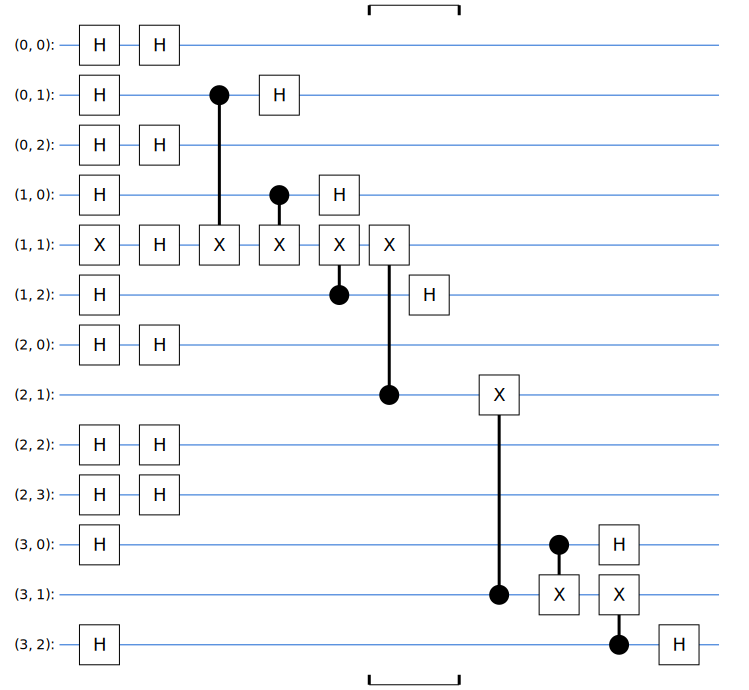

In [3]:
qubit_map_F = {
    0: (0, 1),
    1: (0, 0),
    2: (1, 0),
    3: (0, 2),
    4: (1, 2),
    5: (3, 0),
    6: (3, 2),
    7: (2, 0),
    8: (2, 2),
    9: (2, 3),
    10: (1, 1),
}
CX_gates_F = [
    ((0, 1), (1, 1)),
    ((1, 0), (1, 1)),
    ((1, 2), (1, 1)),
    ((2, 1), (1, 1)),
    ((3, 1), (2, 1)),
    ((3, 0), (3, 1)),
    ((3, 2), (3, 1)),
]
grid_circuit_F = build_routed_circuit(qubit_map=qubit_map_F, CX_gates=CX_gates_F)
SVGCircuit(grid_circuit_F)

This routing is particularly inefficient as it involves more qubits and CX gates than necessary: 13 qubits and 7 gates. The most efficient routing will use 11 qubits and 5 gates.<br>
<b>For this part you will be scored on how efficient your routing is.</b>

### Rerouting the circuit for D

In [ ]:
qubit_map_D = {
    0: 
    1: 
    2: 
    3: 
    4: 
    5: 
    6: 
    7: 
    8: 
    9: 
    10: 
}
CX_gates_D = [
    
]
grid_circuit_D = build_routed_circuit(qubit_map=qubit_map_D, CX_gates=CX_gates_D)
SVGCircuit(grid_circuit_D)

### Rerouting the circuit for C

In [ ]:
qubit_map_C = {
    0: 
    1: 
    2: 
    3: 
    4: 
    5: 
    6: 
    7: 
    8: 
    9: 
    10: 
}
CX_gates_C = [
    
]
grid_circuit_C = build_routed_circuit(qubit_map=qubit_map_C, CX_gates=CX_gates_C)
SVGCircuit(grid_circuit_C)

### Rerouting the circuit for M

In [ ]:
qubit_map_M = {
    0: 
    1: 
    2: 
    3: 
    4: 
    5: 
    6: 
    7: 
    8: 
    9: 
    10: 
}
CX_gates_M = [
    
]
grid_circuit_M = build_routed_circuit(qubit_map=qubit_map_M, CX_gates=CX_gates_M)
SVGCircuit(grid_circuit_M)

### Rerouting the circuit for 2

In [ ]:
qubit_map_2 = {
    0: 
    1: 
    2: 
    3: 
    4: 
    5: 
    6: 
    7: 
    8: 
    9: 
    10: 
}
CX_gates_2 = [
    
]
grid_circuit_2 = build_routed_circuit(qubit_map=qubit_map_2, CX_gates=CX_gates_2)
SVGCircuit(grid_circuit_2)

### Rerouting the circuit for 6

In [ ]:
qubit_map_6 = {
    0: 
    1: 
    2: 
    3: 
    4: 
    5: 
    6: 
    7: 
    8: 
    9: 
    10: 
}
CX_gates_6 = [
    
]
grid_circuit_6 = build_routed_circuit(qubit_map=qubit_map_6, CX_gates=CX_gates_6)
SVGCircuit(grid_circuit_6)

### Submitting the notebook
Once finished, please save the notebook and send it to viet.phamngoc@infleqtion.com